In [1]:
%%capture otp
! python3 -m pip install --upgrade pip
! python3 -m pip install --upgrade numpy matplotlib
! python3 -m pip install --upgrade pandas seaborn

In [2]:
import numpy as np              # біблиотека для аналізу даних
import pandas as pd             # біблиотека для аналізу даних

import matplotlib.pyplot as plt # Інтерфейс Matplotlib
import seaborn as sns           # Інтерфейс Seaborn

In [4]:
from IPython.display import Image, HTML     # Вбудовані функції для зручної роботи
Image(url='https://seaborn.pydata.org/_static/logo-wide-lightbg.svg')

Seaborn is a Python data visualization library based on **matplotlib**. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [5]:
iris = pd.read_csv('../datasets/iris.csv', index_col='Id')
flights = pd.read_csv('../datasets/flights.csv')
mtcars = pd.read_csv('../datasets/mtcars.csv')
mtcars['carb'] = mtcars['carb'].astype(str)

xs = np.linspace(0, 2, 100)
df = pd.DataFrame({'x': xs, 'y': xs, 'y2': xs ** 2, 'y3': xs ** 3})
df.head(3)

,x,y,y2,y3
0,0.000000,0.000000,0.000000,0.000000
1,0.020202,0.020202,0.000408,0.000008
2,0.040404,0.040404,0.001632,0.000066


In [4]:
iata_carrier = {'OO': 'Skywest Airlines ', 'B6': 'Jetblue Airways Corporation', 'WN': 'Southwest Airlines', 
                'UA': 'United Airlines, Inc.', 'AA': 'American Airlines', 'OH': 'Jetstream Intl', 
                'HA': 'Hawaiian Airlines Inc.', 'AQ': '9 Air Co Ltd', 'US': 'Puerto Rico International Airlines Inc.'}
iata_org = {'ORD': 'O`Hare International Airpor', 'SFO': 'San Francisco International Airport',
            'JFK': 'John F. Kennedy International Airport', 'LGA': 'LaGuardia Airport', 'SMF': 'Sacramento International Airport',
            'SJC': 'San Jose International Airport', 'TUS': 'Tucson International Airport', 'OGG': 'Kahului Airport'}

In [5]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

## Налаштування

#### Налаштування Matplotlib

In [ ]:
plt.ion()
%matplotlib inline

#### Стилі
https://seaborn.pydata.org/generated/seaborn.set_style.html  
`darkgrid, whitegrid, dark, white, ticks`

In [ ]:
sns.set_style(style='white', rc=None)
sinplot()

#### Палітри
https://seaborn.pydata.org/tutorial/color_palettes.html  
``

In [ ]:
plt.colormaps()

In [ ]:
palette = sns.color_palette("tab10") # viridis, tab10
display(palette)
# sns.palplot(palette)

In [ ]:
sns.set_palette(palette)

#### Контекст
https://seaborn.pydata.org/generated/seaborn.set_context.html  
`paper, notebook, talk, poster`

In [ ]:
sns.set_context(context='notebook', font_scale=1, rc=None)
sinplot()

#### Розмір

In [ ]:
sns.set(style='ticks', context='notebook', rc={'figure.figsize': (6.4, 4.8)})
# sns.set(style='ticks', rc=None)

### Як побудувати графік?

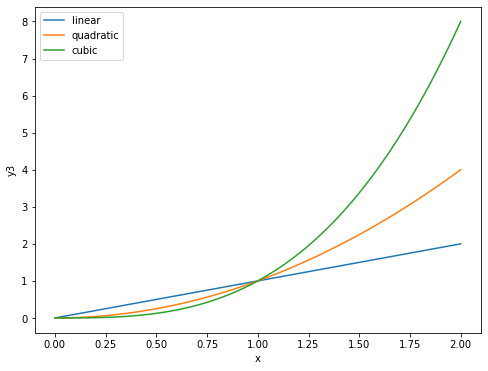

In [6]:
# Pyplot-style
plt.figure(figsize=[8,6])
sns.lineplot(x='x', y='y', label='linear', data=df)
sns.lineplot(x='x', y='y2', label='quadratic', data=df)
sns.lineplot(x='x', y='y3', label='cubic', data=df)
plt.show()

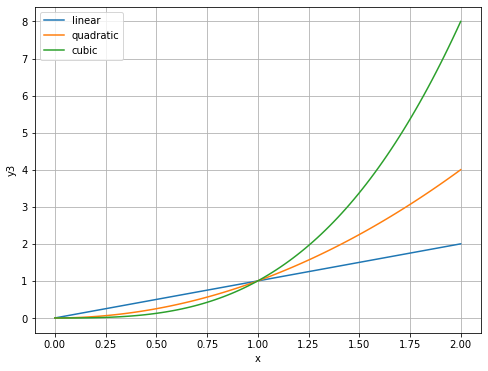

In [7]:
# OOP-style
# ax = plt.gca() # Get the current Axes instance on the current figure
fig, ax = plt.subplots(figsize=[8,6])
sns.lineplot(x='x', y='y', label='linear', data=df, ax=ax)
sns.lineplot(x='x', y='y2', label='quadratic', data=df, ax=ax)
sns.lineplot(x='x', y='y3', label='cubic', data=df, ax=ax)

ax.legend()  # Add a legend.
ax.grid() # Add grid
plt.show()

### Типи графіків
* **lineplot()** - лінійний графік
* **scatterplot()** - точковий графік
* **barplot()** - стовпчикова діаграмма
* **heatmap()** - теплова діаграмма  
* **boxplot()** - діаграма box-and-whiskers
* **displot() / histplot()** - гістограмма
* **countplot()** - стовпчикова діаграмма кількості категоріальної змінної
Комбінація графіків  
* **pairplot()** - графік відношення двох змінних  
* **relplot()** - графік відношення двох змінних  
* **catplot()** - графік для категоріальних змінних
### Додаткові функції


### Lineplot

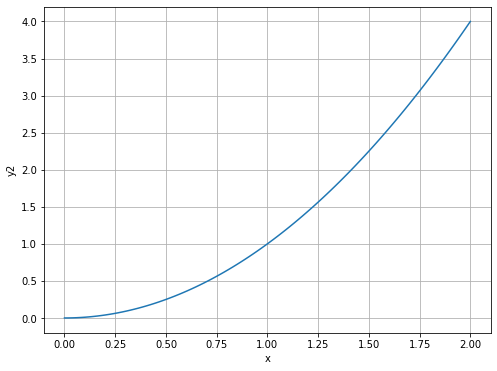

In [76]:
plt.figure(figsize=[8,6])
sns.lineplot(x='x', y='y2', data=df,
            )
plt.grid() # Add grid
plt.show()

In [74]:
flights

,mon,dom,dow,carrier,flight,org,mile,depart,duration,delay
0,10,10,1,OO,5836,ORD,157,8.18,51,27.0
1,1,4,1,OO,5866,ORD,466,15.50,102,NaN
2,11,22,1,OO,6016,ORD,738,7.17,127,-19.0
3,2,14,5,B6,199,JFK,2248,21.17,365,60.0
4,5,25,3,WN,1675,SJC,386,12.92,85,22.0
...,...,...,...,...,...,...,...,...,...,...
274995,4,31,6,UA,259,ORD,888,16.75,154,46.0
274996,3,14,1,UA,119,SFO,337,16.20,84,33.0
274997,10,4,2,AA,716,ORD,1005,7.00,155,-6.0
274998,9,27,1,B6,128,JFK,267,22.50,86,-19.0


### Scatterplot

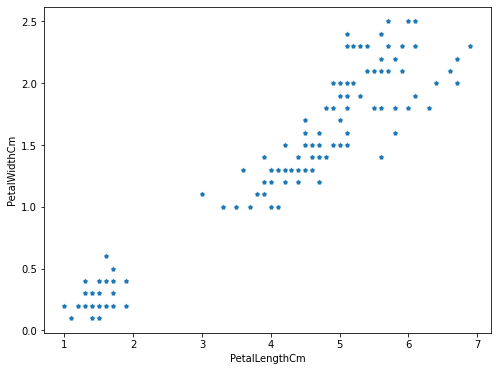

In [22]:
plt.figure(figsize=[8,6])
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', marker='p', data=iris,
#                 hue='Species', style='Species',
#                 hue_order=['Iris-versicolor', 'Iris-virginica', 'Iris-setosa'],
#                 palette={'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'k'},
#                 size='SepalLengthCm', 
#                 alpha=0.5
               )
plt.show()

### Barplot

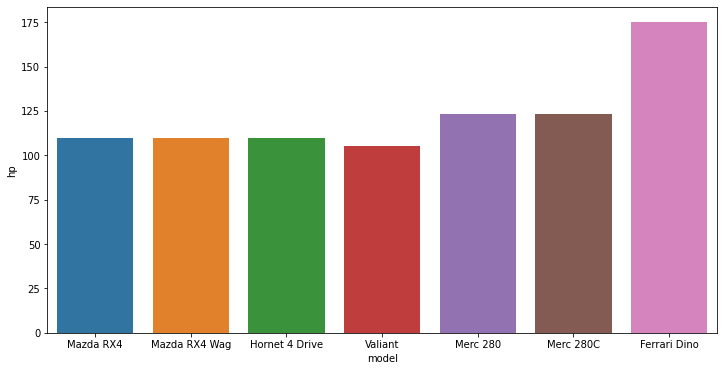

In [14]:
cyl6 = mtcars[mtcars['cyl'] == 6]
plt.figure(figsize=(12,6))
sns.barplot(x='model', y='hp', data=cyl6,
#             hue='gear'
           )
plt.show()

### Pieplot

In [29]:
HTML("""
<iframe width="560" height="315" src="https://www.youtube.com/embed/dQw4w9WgXcQ?start=42" 
title="YouTube video player" frameborder="0" allow="accelerometer; 
autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen>
</iframe>
""")

### Heatmap

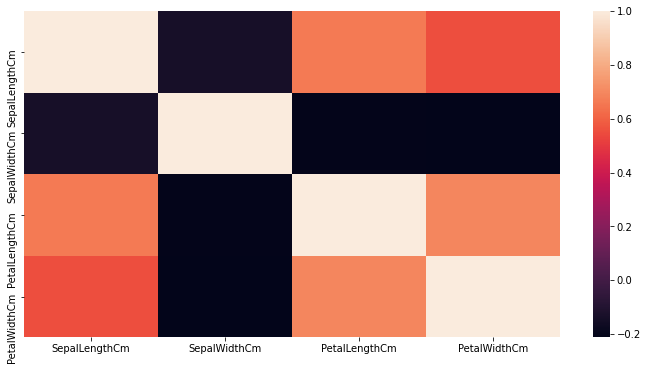

In [72]:
corrs = iris.corr(method='kendall')
plt.figure(figsize=[12,6])
sns.heatmap(data=corrs,
#             annot=True,
#             square=False,
#             cmap='viridis'
           )
plt.show()

### Boxplot

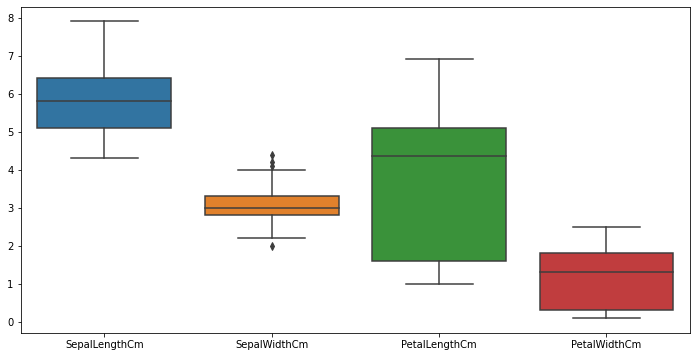

In [60]:
floats = iris.select_dtypes(float)
plt.figure(figsize=[12,6])
sns.boxplot(data=iris,
#             x='SepalLengthCm', y='Species',
#             hue='Species',
           )
plt.show()

### Displot / Histplot

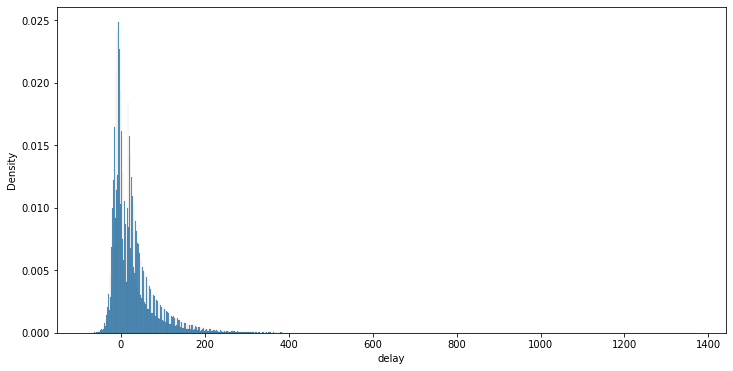

In [44]:
# stat=“count”, “frequency”, “density”, “probability”
plt.figure(figsize=[12,6])
sns.histplot(data=flights, x='delay', stat='density',
#              bins=100, binrange=(-100, 500), cumulative=False, kde=False, 
            )
plt.show()

<Figure size 720x432 with 0 Axes>

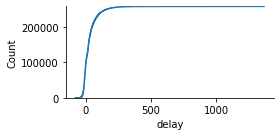

In [43]:
# stat=“count”, “frequency”, “density”, “probability”
# kind="hist", "kde", "ecdf"
plt.figure(figsize=[10,6])
g = sns.displot(kind='ecdf', height=2, aspect=2, data=flights, x='delay', stat='count', 
#                 bins=100, binrange=(-100, 500), cumulative=False, kde=False,
#                 row='org', col='carrier',
               )
plt.show()

### Countplot

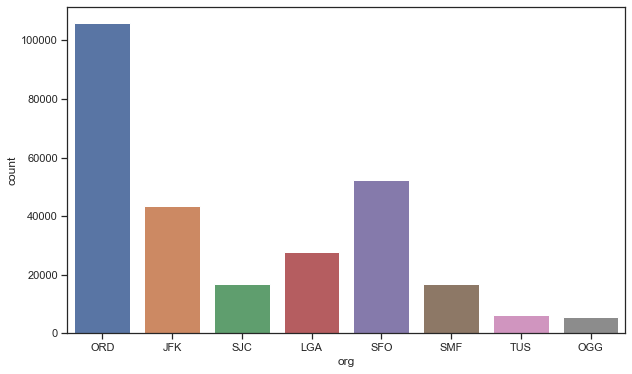

In [70]:
plt.figure(figsize=[10,6])
g = sns.countplot(x='org', orient='v', data=flights,
#                   order=flights['org'].value_counts().index,
#                   hue='carrier',
                 )
#g.set_xticklabels(iata_org.values())
#g.tick_params(rotation=90)
plt.show()

### Plot

### Plot

### Кастомізація графіку

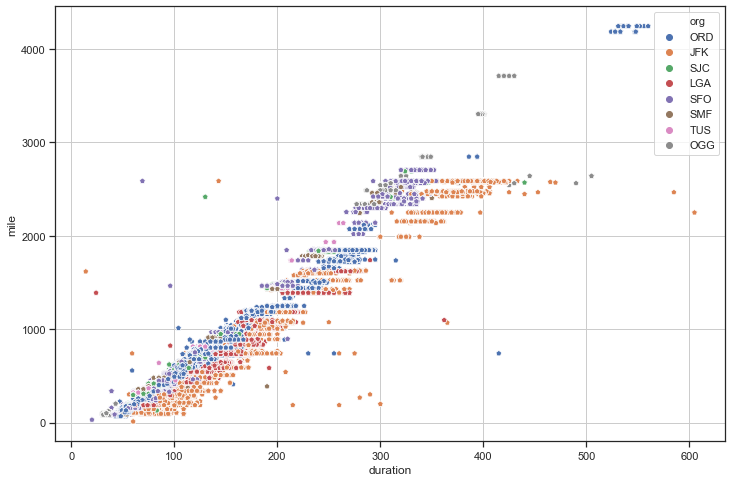

In [114]:
plt.figure(figsize=[12,8])
ax = sns.scatterplot(x='duration', y='mile', hue='org', marker='p', data=flights)
#ax.set(xscale="log", yscale="log")
ax.grid()
ax.legend()
#ax.xaxis.grid(True, "minor", linewidth=.25)
#ax.yaxis.grid(True, "minor", linewidth=.25)
#ax.despine(left=True, bottom=True)
plt.show()

### Комбіновані графіки

### Pairlot

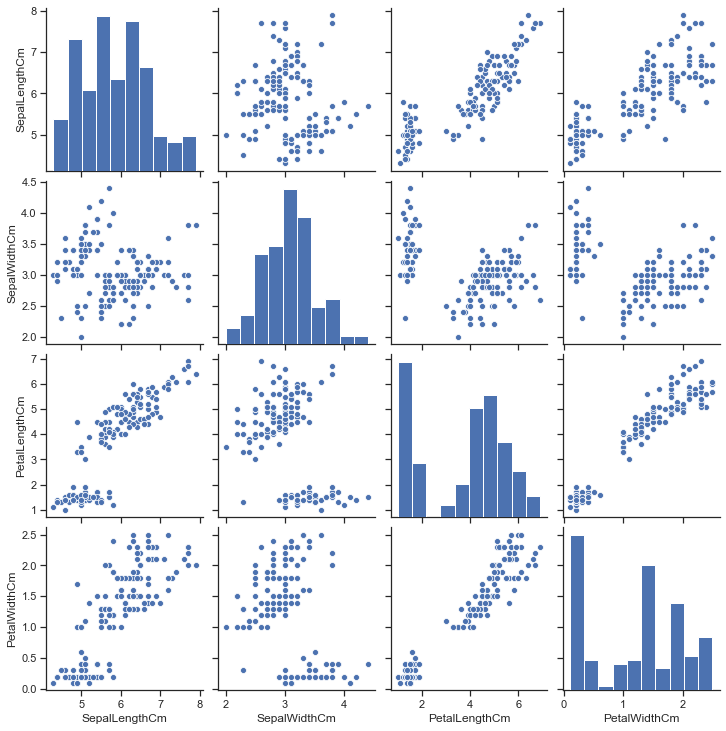

In [93]:
g = sns.pairplot(iris, kind='scatter',
#                 hue="Species", 
                )
plt.show()

### Relplot

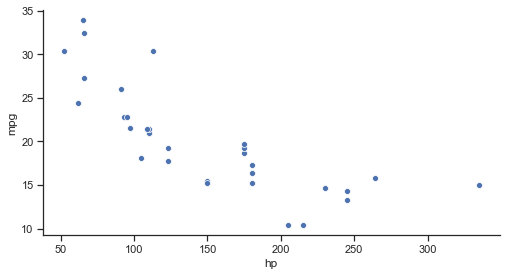

In [94]:
g = sns.relplot(kind='scatter', x="hp", y="mpg", 
#                 hue="carb", palette='rainbow', hue_order=[1,2,3,4,6,8],
#                 size="cyl", sizes={4:50, 6:100, 8:150}, size_order=[8,6,4],
#                 row='gear', col='am', col_wrap=2
#                 style='carb',
                data=mtcars, height=4, aspect=1.8, legend="full"
               )
plt.show()

### Catplot

### Матеріали
* https://learn.datacamp.com/courses/introduction-to-data-visualization-with-seaborn
* https://learn.datacamp.com/courses/intermediate-data-visualization-with-seaborn